In [1]:
library(ggplot2)
library(data.table)

In [2]:
graph_dt = fread("/Users/ebiederstedt/Downloads/graph_NA12878_only_chr21_scores_identity.csv")
ref_dt = fread("/Users/ebiederstedt/Downloads/ref_NA12878_only_chr21_scores_identity.csv")

Read 13403870 rows and 2 (of 2) columns from 0.172 GB file in 00:00:06
Read 13410334 rows and 2 (of 2) columns from 0.183 GB file in 00:00:06


In [3]:
head(graph_dt)

indentity,scores
1.0000000,111
0.5148515,57
0.9801980,101
0.9900990,106
1.0000000,111
1.0000000,111


In [4]:
head(ref_dt)

indentity,scores
0.9900990,106
0.9801980,101
0.9900990,106
0.3168317,37
1.0000000,111
1.0000000,111


In [5]:
graph_dt[, type:='graph_chr21']
ref_dt[, type:='ref_chr21']

In [6]:
print(dim(graph_dt)[1])  ### number of scores, identity values 
print(dim(ref_dt)[1])  

[1] 13403870
[1] 13410334


In [7]:
print("graph_dt, mean scores ")
mean(graph_dt$scores)
print("ref_dt, mean scores ")
mean(ref_dt$scores)
print("graph_dt, mean identity ")
mean(graph_dt$indentity)
print("ref_dt, mean identity ")
mean(ref_dt$indentity)

[1] "graph_dt, mean scores "


[1] 95.8046

[1] "ref_dt, mean scores "


[1] 95.14737

[1] "graph_dt, mean identity "


[1] 0.8739692

[1] "ref_dt, mean identity "


[1] 0.8725033

In [8]:
list_of_dts = list(graph_dt, ref_dt)

In [9]:
final = Reduce(function(...) merge(..., all = TRUE), list_of_dts)

In [10]:
final = final[, c('indentity', 'scores', 'type')]

In [11]:
## misspelled "identity", indentity

final[, identity:= indentity]
final[, indentity := NULL]

In [12]:
head(final)

scores,type,identity
20,graph_chr21,0.1485149
21,graph_chr21,0.1584158
21,graph_chr21,0.1584158
21,ref_chr21,0.1584158
21,ref_chr21,0.1584158
21,ref_chr21,0.1584158


In [13]:
pp = ggplot(final, aes(type, scores, fill=type)) + geom_boxplot() + 
     labs(title= "GAM scores, Reference vs. Graph, chr21 only", x="type", y = "scores, from 20 to 111")  + theme(legend.position="none")

## scale_y_continuous(limits=c(0,0.04)) +

## + scale_fill_brewer(palette="Dark2") 

### primary only!!


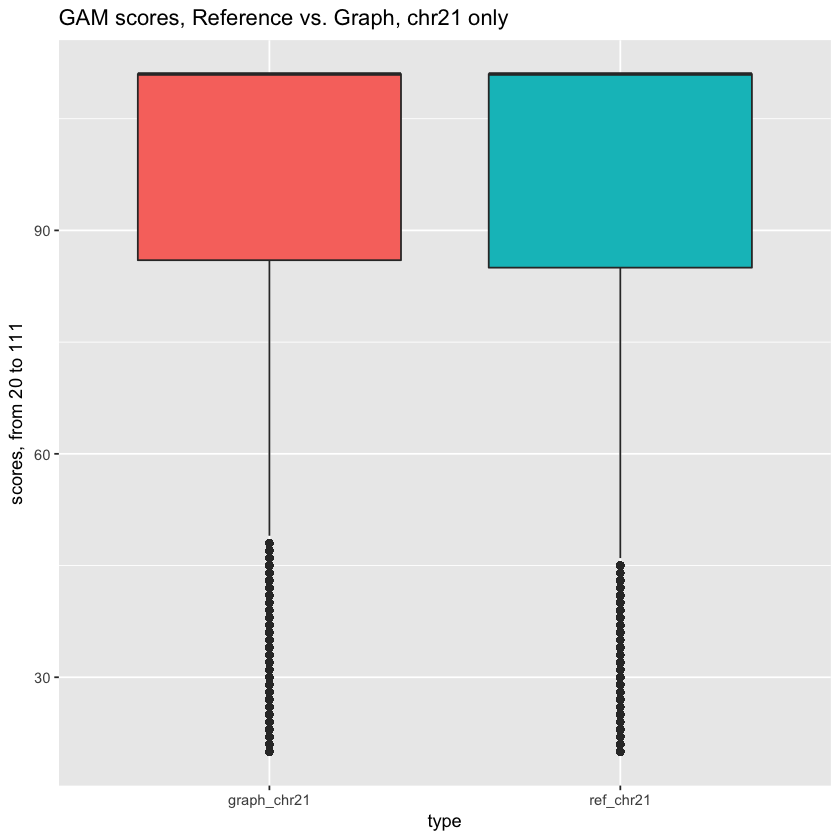

In [14]:
print(pp)

In [15]:
min(final$scores)

[1] 20

In [16]:
max(final$scores)

[1] 111

In [17]:
dd = ggplot(final, aes(type, identity, fill=type)) + geom_boxplot() + 
     labs(title= "GAM identity values, Reference vs. Graph, chr21 only", x="type", y = "scores, from 0.14 to 1.0")  + theme(legend.position="none")

## scale_y_continuous(limits=c(0,0.04)) +

## + scale_fill_brewer(palette="Dark2") 

### primary only!!


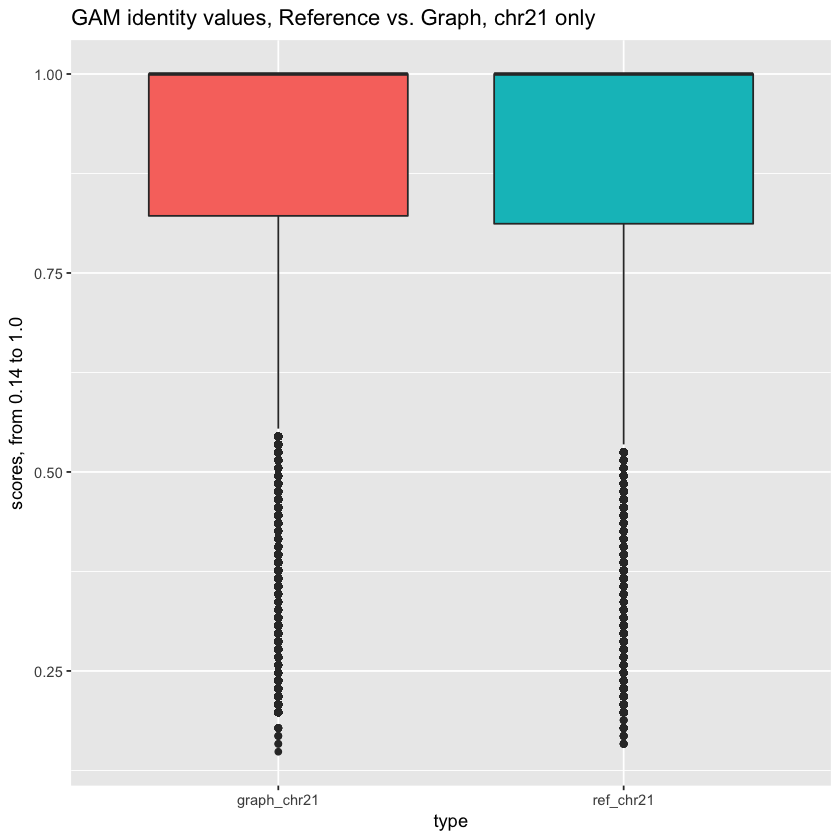

In [18]:
print(dd)

In [19]:
min(final$identity)

[1] 0.1485149

In [20]:
max(final$identity)

[1] 1

In [21]:
graph_map = fread("/Users/ebiederstedt/Downloads/graph_NA12878_only_chr21_mapping_quality.csv")
ref_map = fread("/Users/ebiederstedt/Downloads/ref_NA12878_only_chr21_mapping_quality.csv")

In [22]:
graph_map[, type:='graph_chr21']
ref_map[, type:='ref_chr21']

In [23]:
print(dim(graph_map)[1])  ### number of scores, identity values 
print(dim(ref_map)[1])  

[1] 12659777
[1] 12913935


In [24]:
print("graph mapping quality")
print(mean(graph_map$V1))
print("ref mapping quality")
print(mean(ref_map$V1))

[1] "graph mapping quality"
[1] 55.46817
[1] "ref mapping quality"
[1] 55.70407


In [25]:
list_of_dts = list(graph_map, ref_map)

In [26]:
final = Reduce(function(...) merge(..., all = TRUE), list_of_dts)

In [27]:
final = final[, c('V1', 'type')]

In [28]:
final[, mapping_quality := V1]
final[, V1:=NULL]

In [29]:
head(final)

type,mapping_quality
graph_chr21,1
graph_chr21,1
graph_chr21,1
graph_chr21,1
graph_chr21,1
graph_chr21,1


In [30]:
max(final$mapping_quality)

[1] 60

In [31]:
min(final$mapping_quality)

[1] 1

In [32]:
dd = ggplot(final, aes(type, mapping_quality, fill=type)) + geom_boxplot() + 
     labs(title= "GAM mapping qualities, Reference vs. Graph, chr21 only", x="type", y = "Mapping Qualities, from 1 to 60")  + theme(legend.position="none")


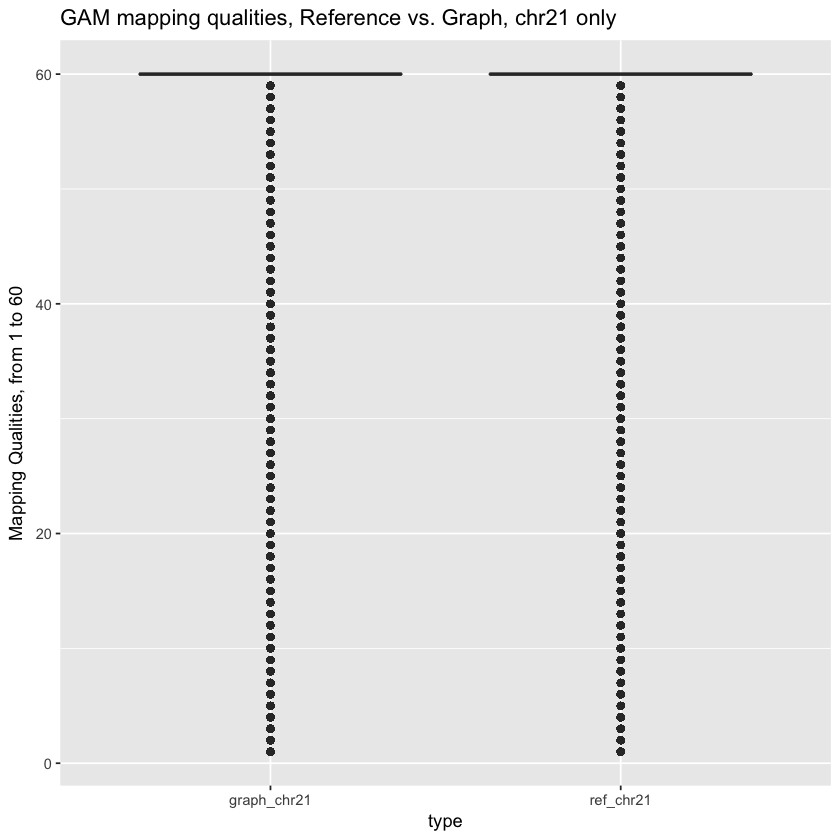

In [33]:
print(dd)

In [34]:
dd = ggplot(final, aes(type, mapping_quality, fill=type)) + geom_point() + 
     labs(title= "GAM mapping qualities, Reference vs. Graph, chr21 only", x="type", y = "Mapping Qualities, from 1 to 60")  + theme(legend.position="none")


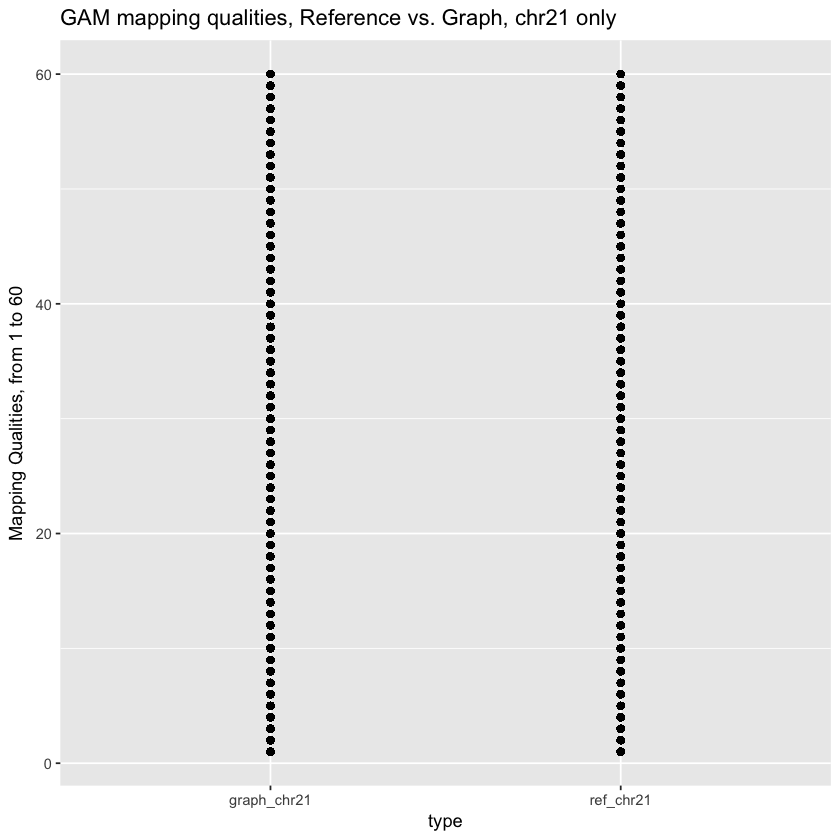

In [35]:
print(dd)

In [36]:
13403870 - 13410334

[1] -6464

In [37]:
dt = data.table(type=c("GRAPH", "REFERENCE"),
                number_mappings=c(13403870,13410334)) 

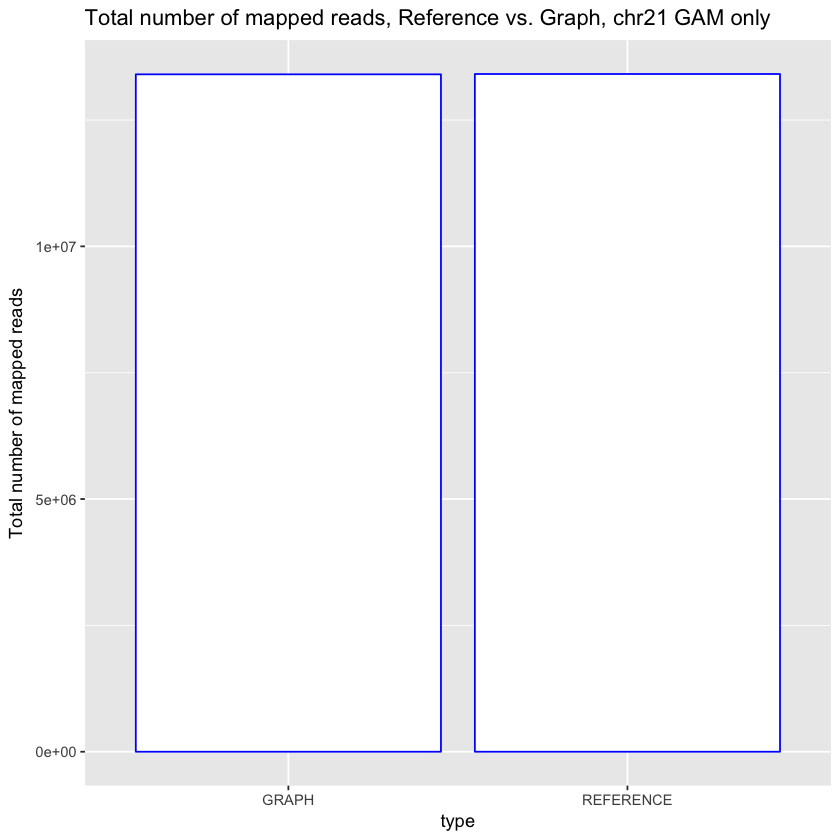

In [38]:
ggplot(data=dt, aes(x=type, y=number_mappings)) +
  geom_bar(stat="identity", color="blue", fill="white") +
  labs(title= "Total number of mapped reads, Reference vs. Graph, chr21 GAM only", x="type", y = "Total number of mapped reads") 



In [39]:
graph_map[, mapping_quality := V1]
graph_map[, V1 := NULL]

ref_map[, mapping_quality := V1]
ref_map[, V1 := NULL]

In [40]:
aa = ggplot(graph_map, aes(x = mapping_quality)) + geom_density(fill = "steelblue") +
  geom_vline(aes(xintercept = mean(mapping_quality)), 
             linetype = "dashed", size = 0.6) +
  labs(title= "Density of mapping quality, Graph, chr21 GAM only", x="mapping quality", y = "density") 



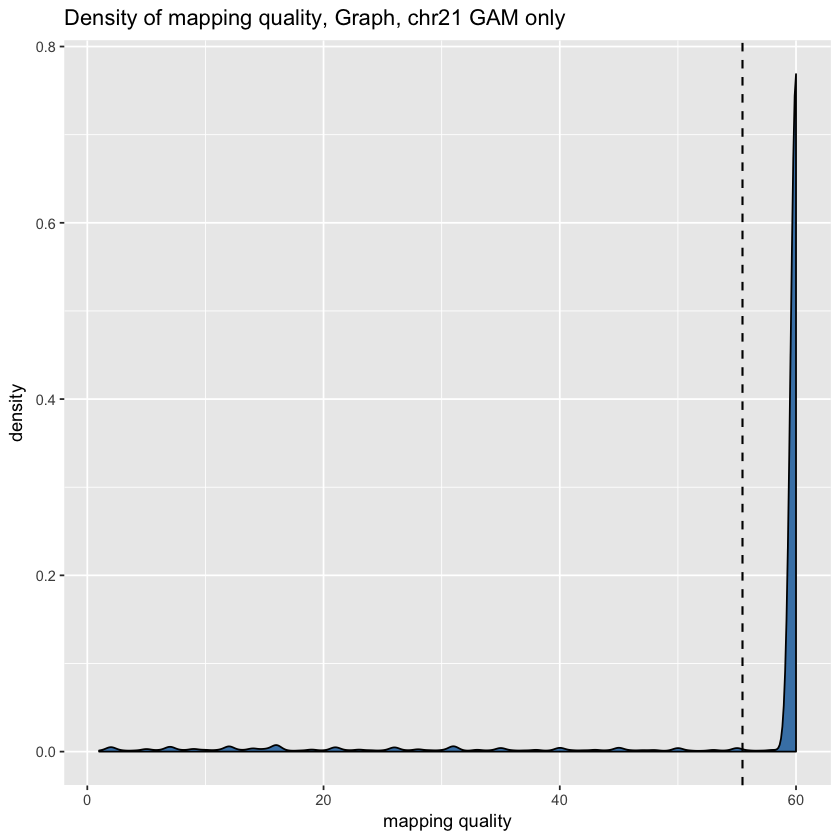

In [41]:
print(aa)

In [42]:
bb = ggplot(ref_map, aes(x = mapping_quality)) + geom_density( fill = "steelblue") +
  geom_vline(aes(xintercept = mean(mapping_quality)), 
             linetype = "dashed", size = 0.6) +
  labs(title= "Density of mapping quality, Reference, chr21 GAM only", x="mapping quality", y = "density") 



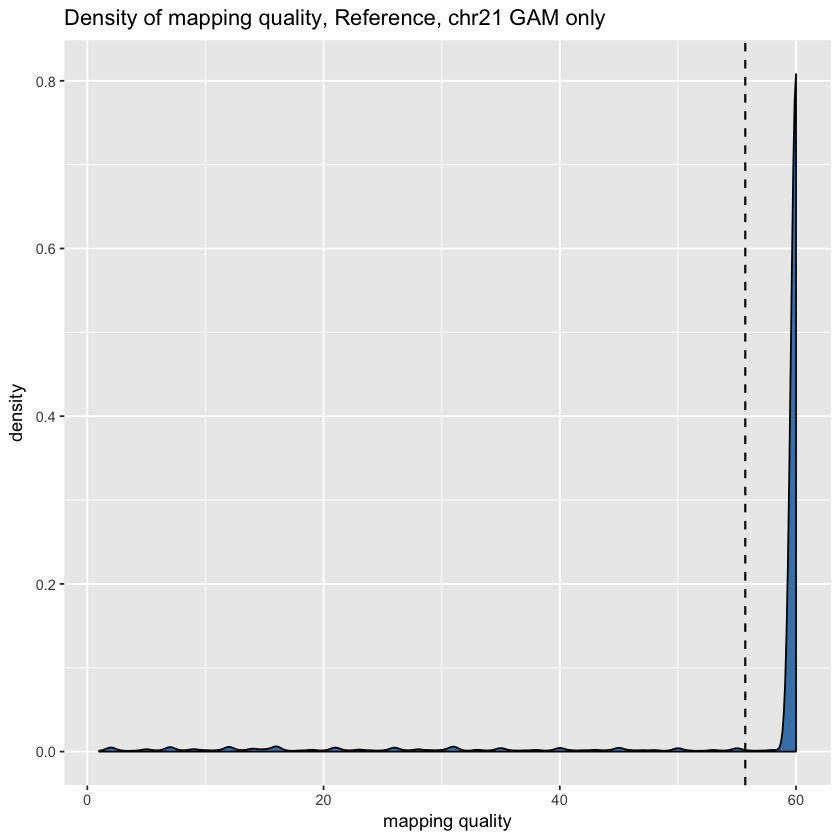

In [43]:
print(bb)